<div align='center' ><font size='6'>《计算机视觉与机器学习》课外实践练习一</font></div> 

队长学号：20211000581

队长姓名：林玉雯

学号：20211000742

姓名：张玥

学号：20211004187

姓名：王曼曼

## 实习要求：
1. 完成对指定HelloRS32数据集的读取和抽样展示；
2. 实现SVM和Softmax损失函数的损失值及其解析梯度计算，并将解析梯度与数值梯度进行对比验证；
3. 实现简单的基于SVM和Softmax损失的线性分类器训练，打印训练过程，输出模型在训练数据集上的总体精度，比较两个分类器的训练用时；
4. 将HelloRS32数据集分为训练集(train)、验证集(val)和测试集(test)，并通过调校超参数找到两个分类器的最优超参数组合，然后输出分类器在测试集上的总体精度；
5. 确定最优超参数后，将两个线性分类器的权重可视化为RGB图像进行显示；
6. 从测试集中对每个类别的图像样本进行抽样展示，展示时设法对正确预测和错误预测的样本进行区分，分析与定量评价的精度是否相符（**该部分无示例代码，需要自行编写**）。

## HelloRS32数据集图像的读取

In [3]:
from svm_softmax_sgd import *

# 加载数据集
root = 'D:/CVML/RS32/all'
X,Y=load_data(root)

#数据集划分
num_train=int(len(X)*0.6)
num_val=int(len(X)*0.1)
num_test=int(len(X)*0.3)
Xtrain=X[:num_train]
Ytrain=Y[:num_train]
Xval=X[num_train:num_train+num_val]
Yval=Y[num_train:num_train+num_val]
Xtest=X[num_train+num_val:]
Ytest=Y[num_train+num_val:]
#记录训练样本均值
temp = np.reshape(Xtrain, (Xtrain.shape[0], -1))
mean_image = np.mean(temp, axis=0)

print('Xtrain.shape:', Xtrain.shape)
print('Ytrain.shape:', Ytrain.shape)
print('Xval.shape:', Xval.shape)
print('Yval.shape:', Yval.shape)
print('Xtest.shape:', Xtest.shape)
print('Xtest.shape:', Ytest.shape)

Xtrain.shape: (7680, 32, 32, 3)
Ytrain.shape: (7680,)
Xval.shape: (1280, 32, 32, 3)
Yval.shape: (1280,)
Xtest.shape: (3841, 32, 32, 3)
Xtest.shape: (3841,)


## 数据显示及预处理

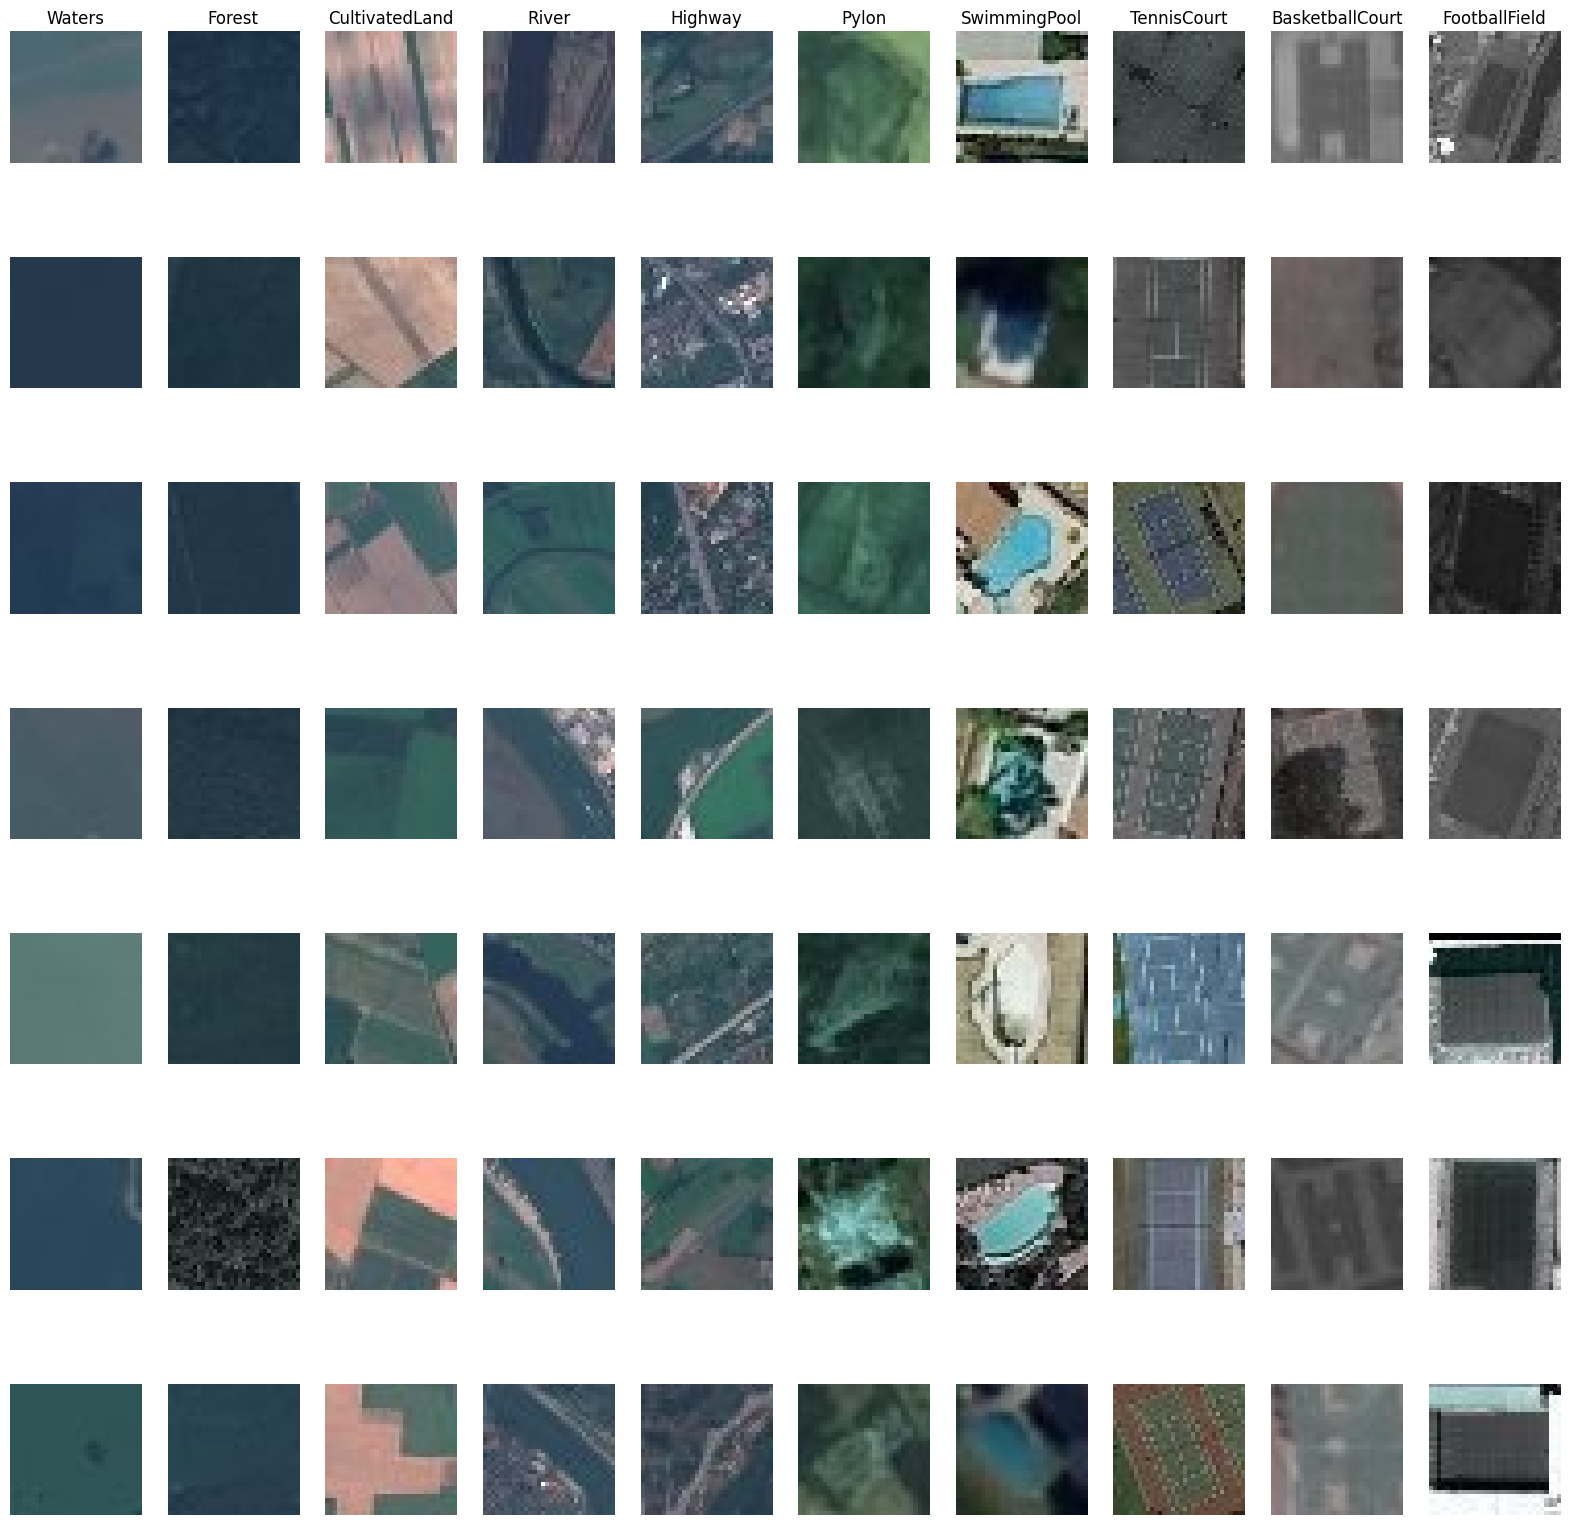

Xtrain.shape: (7680, 3073)
Ytrain.shape: (7680,)
Xval.shape: (1280, 3073)
Yval.shape: (1280,)
Xtest.shape: (3841, 3073)
Xtest.shape: (3841,)


In [4]:
#数据显示
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
visualize_samples(classes, Xtrain, Ytrain)

# 数据预处理
Xtrain, Xval, Xtest = data_processing(Xtrain, Xval, Xtest)
print('Xtrain.shape:', Xtrain.shape)
print('Ytrain.shape:', Ytrain.shape)
print('Xval.shape:', Xval.shape)
print('Yval.shape:', Yval.shape)
print('Xtest.shape:', Xtest.shape)
print('Xtest.shape:', Ytest.shape)

## 比较数值梯度与解析梯度

In [5]:
# generate a random SVM weight matrix of small numbers
W = np.random.randn(Xtrain.shape[1], len(classes)) * 0.0001
svm_grad_check(W, Xtrain[:100, :], Ytrain[0:100])
softmax_grad_check(W, Xtrain[:100, :], Ytrain[0:100])

numerical: -5.244531 analytic: -5.244531, error: 7.770774e-12
numerical: 0.873273 analytic: 0.873273, error: 5.529544e-12
numerical: 26.570000 analytic: 26.570000, error: 1.424696e-13
numerical: -25.308671 analytic: -25.308671, error: 3.811893e-13
numerical: 30.840000 analytic: 30.840000, error: 1.057981e-12
numerical: 10.141381 analytic: 10.141381, error: 2.392676e-12
numerical: 29.528684 analytic: 29.528684, error: 7.247113e-13
numerical: 24.480000 analytic: 24.480000, error: 1.349683e-13
numerical: -10.186797 analytic: -10.186797, error: 4.424851e-13
numerical: -8.937173 analytic: -8.937173, error: 4.309923e-12
numerical: -42.081832 analytic: -42.081832, error: 1.560154e-13
numerical: 9.310886 analytic: 9.310886, error: 1.690335e-13
numerical: -20.075530 analytic: -20.075530, error: 3.368574e-13
numerical: -9.641653 analytic: -9.641653, error: 1.099623e-12
numerical: -15.872955 analytic: -15.872955, error: 2.040304e-12
numerical: -7.498809 analytic: -7.498809, error: 6.200943e-12
nu

## 训练简单的SVM和Softmax线性分类器，并比较运行时间

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
iteration 0 / 1500: loss 786.918564
iteration 100 / 1500: loss 286.464937
iteration 200 / 1500: loss 107.144456
iteration 300 / 1500: loss 41.748901
iteration 400 / 1500: loss 17.627822
iteration 500 / 1500: loss 8.729893
iteration 600 / 1500: loss 5.873777
iteration 700 / 1500: loss 4.375288
iteration 800 / 1500: loss 4.313854
iteration 900 / 1500: loss 3.606527
iteration 1000 / 1500: loss 3.605993
iteration 1100 / 1500: loss 3.657620
iteration 1200 / 1500: loss 3.781222
iteration 1300 / 1500: loss 3.762422
iteration 1400 / 1500: loss 3.652598
That took 5.346993s
training accuracy: 0.550781


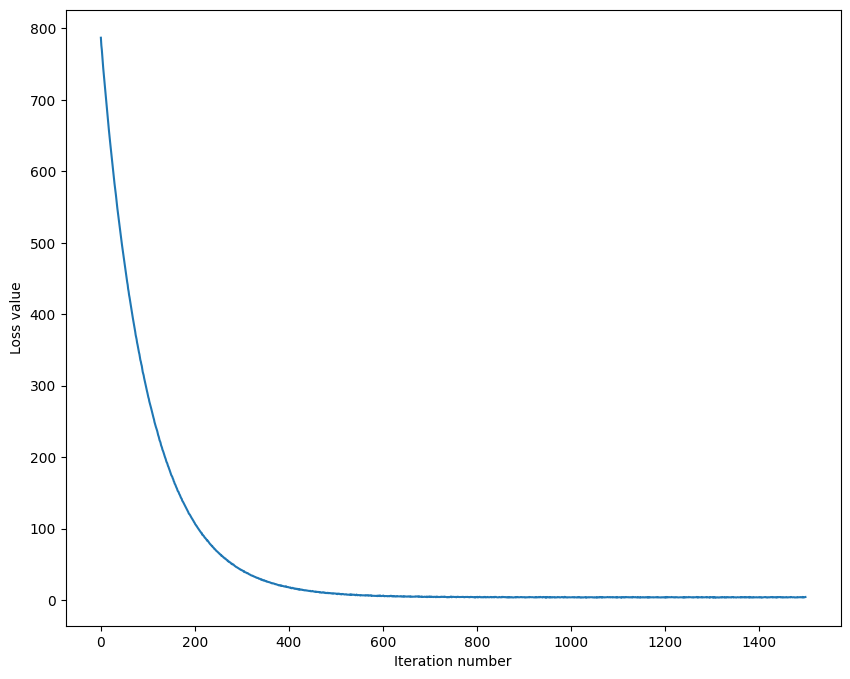

iteration 0 / 1500: loss 777.124678
iteration 100 / 1500: loss 288.956025
iteration 200 / 1500: loss 110.398824
iteration 300 / 1500: loss 45.177575
iteration 400 / 1500: loss 21.105300
iteration 500 / 1500: loss 12.415516
iteration 600 / 1500: loss 9.095894
iteration 700 / 1500: loss 7.961852
iteration 800 / 1500: loss 7.552556
iteration 900 / 1500: loss 7.392977
iteration 1000 / 1500: loss 7.380550
iteration 1100 / 1500: loss 7.327580
iteration 1200 / 1500: loss 7.279334
iteration 1300 / 1500: loss 7.310700
iteration 1400 / 1500: loss 7.291305
That took 5.339988s
training accuracy: 0.407552


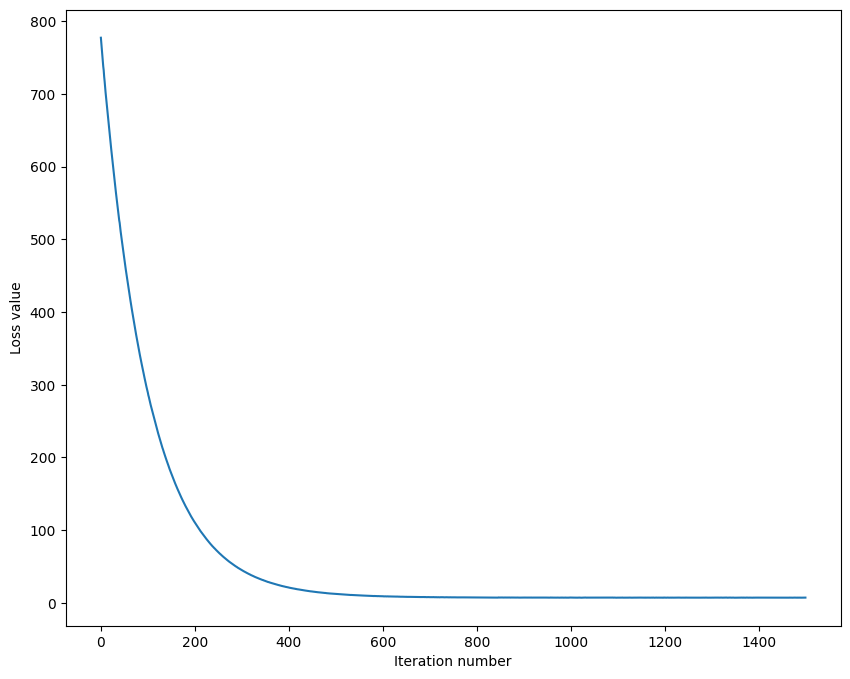

In [6]:
# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

svm = train_a_simple_svm(Xtrain, Ytrain)
softmax = train_a_simple_softmax(Xtrain, Ytrain)

## 训练并找到最佳精度的SVM和Softmax分类器

In [7]:
best_val, best_svm, best_loss_hist = train_and_get_best_svm(Xtrain, Ytrain, Xval, Yval)
best_val, best_softmax, best_loss_hist = train_and_get_best_softmax(Xtrain, Ytrain, Xval, Yval)
y_svm_pred = best_svm.predict(Xtest)
y_acc_svm = best_svm.eval(Ytest, y_svm_pred)
y_softmax_pred = best_softmax.predict(Xtest)
y_acc_softmax = best_softmax.eval(Ytest, y_softmax_pred)
print('best validation svm scroces %f at test data' % np.mean(Ytest == y_svm_pred))
print('best validation softmax scroces %f at test data' % np.mean(Ytest == y_softmax_pred))

start tuning best svm
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.551302 val accuracy: 0.517188
lr 1.000000e-07 reg 3.000000e+04 train accuracy: 0.539583 val accuracy: 0.492188
lr 1.000000e-06 reg 2.500000e+04 train accuracy: 0.527865 val accuracy: 0.474219
lr 1.000000e-06 reg 3.000000e+04 train accuracy: 0.562109 val accuracy: 0.529687
best validation accuracy achieved during cross-validation: 0.529687
start tuning best softmax
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.407031 val accuracy: 0.385156
lr 1.000000e-07 reg 3.000000e+04 train accuracy: 0.402214 val accuracy: 0.379688
lr 1.000000e-06 reg 2.500000e+04 train accuracy: 0.403255 val accuracy: 0.382812
lr 1.000000e-06 reg 3.000000e+04 train accuracy: 0.390885 val accuracy: 0.369531
best validation accuracy achieved during cross-validation: 0.385156
training accuracy: 0.556626
training accuracy: 0.395210
best validation svm scroces 0.556626 at test data
best validation softmax scroces 0.395210 at test data


## 权重可视化

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


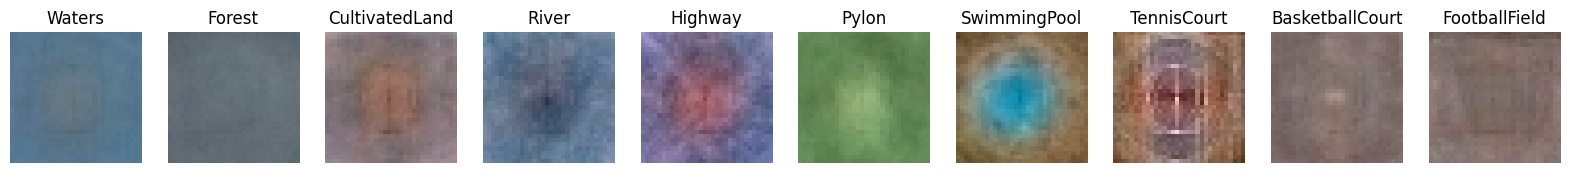

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

visualize_learned_weights(best_svm, classes)

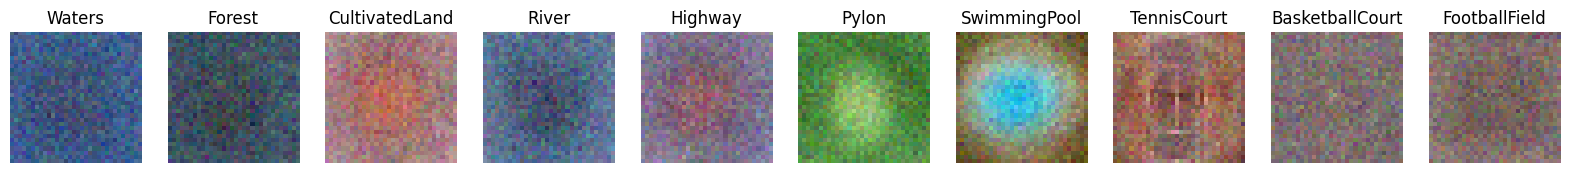

In [9]:
visualize_learned_weights(best_softmax, classes)

## 测试集预测结果可视化

classifying accuracy: 0.536683


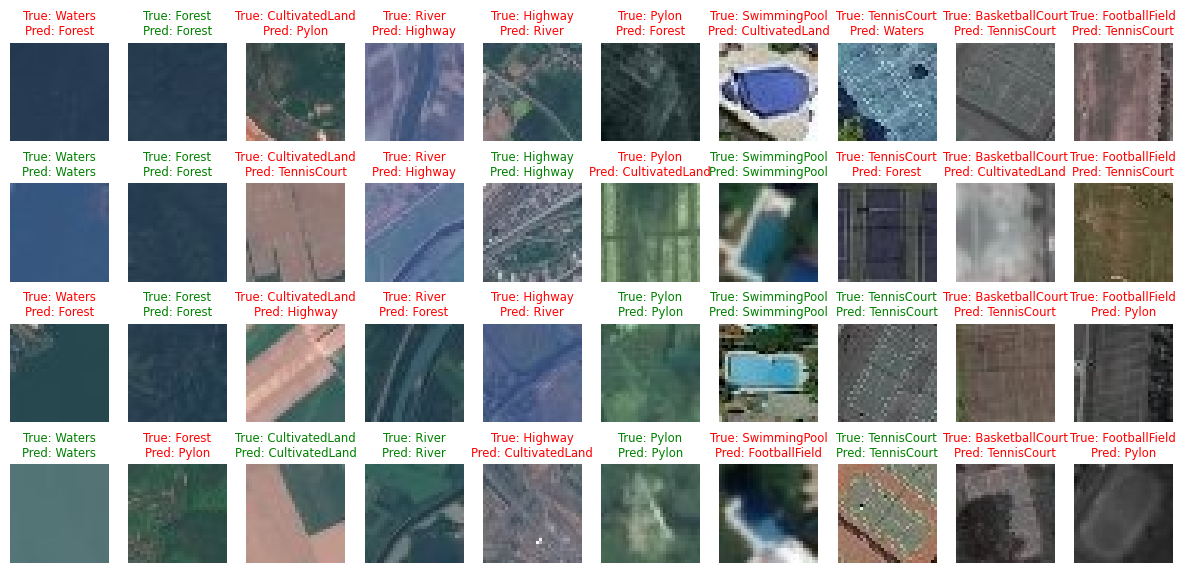

classifying accuracy: 0.385167


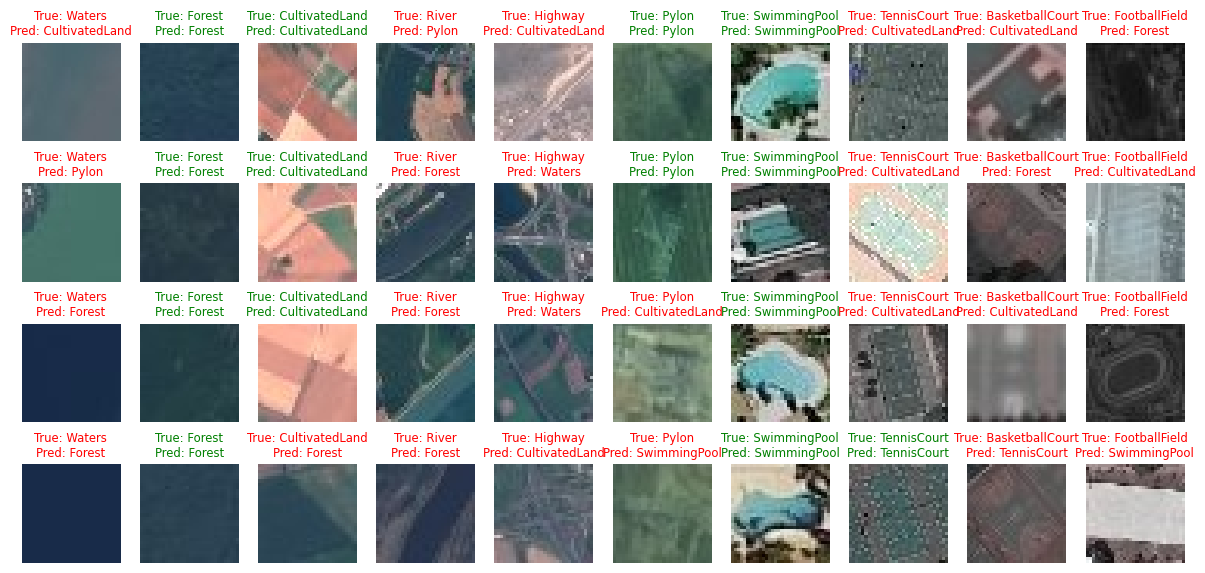

In [10]:

root = 'D:/CVML/RS32/val'
Xtest,Ytest=load_data(root)


Xtest = np.reshape(Xtest, (Xtest.shape[0], -1))
Xtest -= mean_image
Xtest = np.hstack([Xtest, np.ones((Xtest.shape[0], 1))])

plt.rcParams['figure.figsize']=(15.0,7.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'
plt.rcParams.update({'font.size': 7})

visualize_predictions(Xtest, Ytest, best_svm,mean_image)
visualize_predictions(Xtest, Ytest, best_softmax,mean_image)